       MS SubClass  Lot Frontage       Lot Area  Overall Qual  Overall Cond  \
count  2930.000000   2930.000000    2930.000000   2930.000000   2930.000000   
mean     57.387372     69.019795   10147.921843      6.094881      5.563140   
std      42.638025     21.326422    7880.017759      1.411026      1.111537   
min      20.000000     21.000000    1300.000000      1.000000      1.000000   
25%      20.000000     60.000000    7440.250000      5.000000      5.000000   
50%      50.000000     68.000000    9436.500000      6.000000      5.000000   
75%      70.000000     78.000000   11555.250000      7.000000      6.000000   
max     190.000000    313.000000  215245.000000     10.000000      9.000000   

        Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
count  2930.000000     2930.000000   2930.000000   2930.000000   2930.000000   
mean   1971.356314     1984.266553    101.096928    442.604778     49.705461   
std      30.245361       20.860286    178.634545

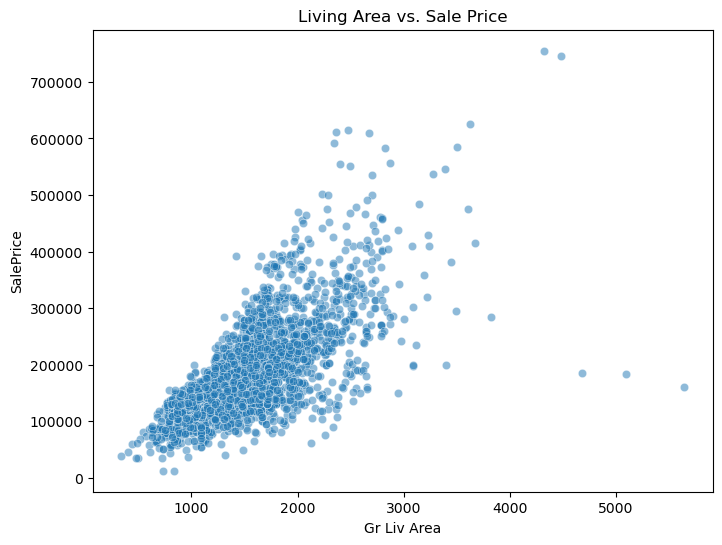

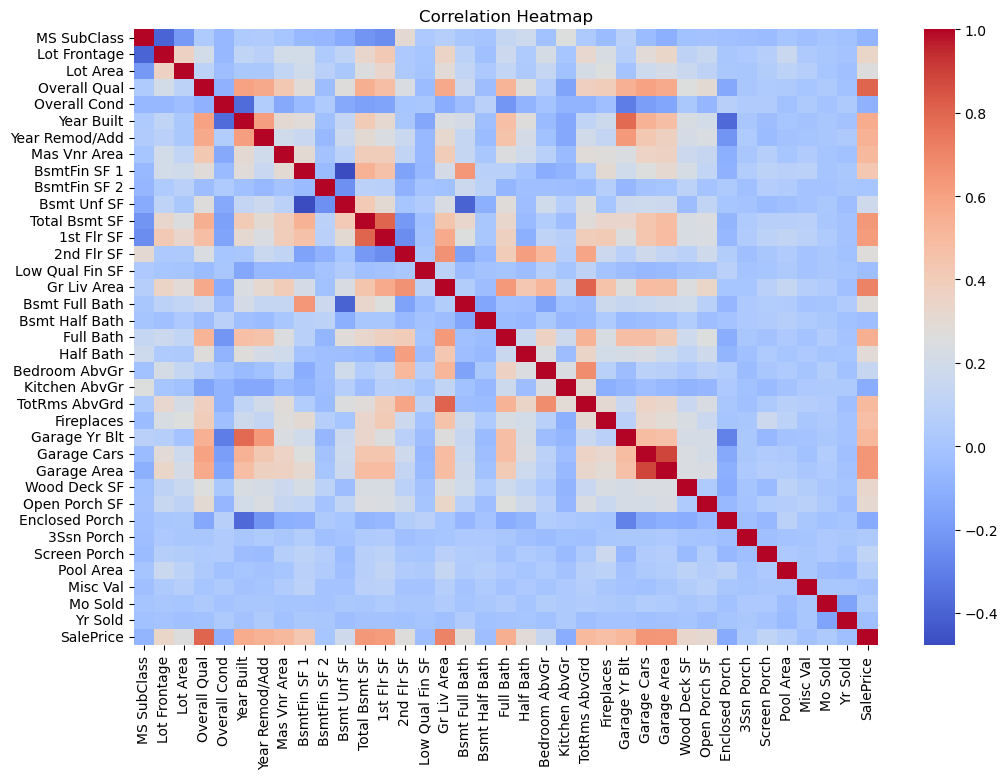

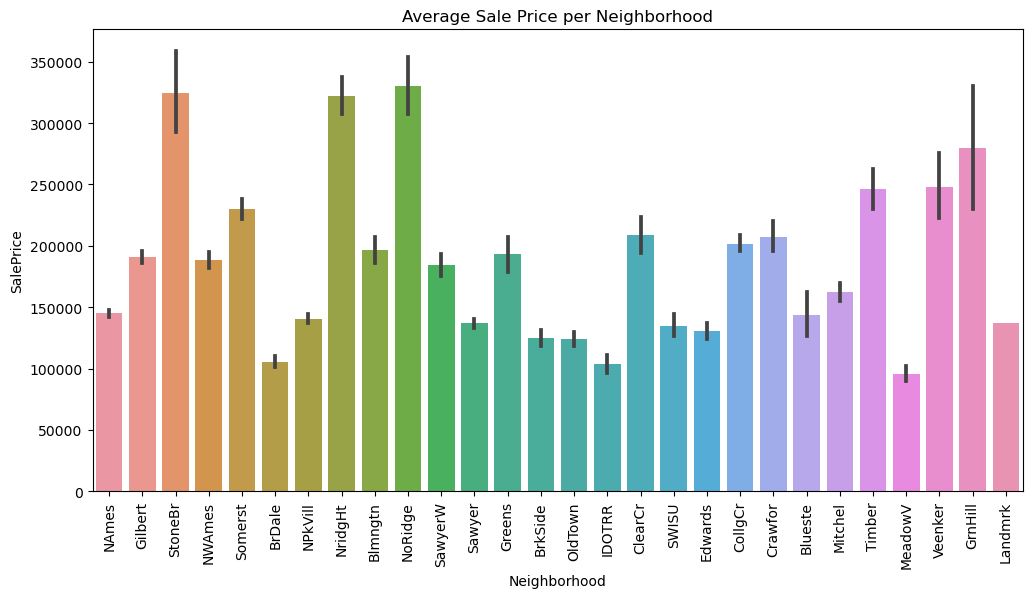

For the attribute SalePrice:
Mean = 180796.06, Standard Deviation = 79886.69, Skewness = 1.74, and Excess Kurtosis = 5.11.
The data is right skewed and leptokurtic.


In [1]:
from corner import corner
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns

def plot_relational_plot(df):
    """Creates a scatter plot showing the relationship between Gr Liv Area and SalePrice."""
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', alpha=0.5)
    ax.set_title('Living Area vs. Sale Price')
    plt.savefig('relational_plot.png')
    plt.show()

def plot_categorical_plot(df):
    """Creates a bar plot showing the average SalePrice per Neighborhood."""
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=df, x='Neighborhood', y='SalePrice', estimator=np.mean)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title('Average Sale Price per Neighborhood')
    plt.savefig('categorical_plot.png')
    plt.show()

def plot_statistical_plot(df):
    """Creates a correlation heatmap to analyze feature relationships."""
    corr = df.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(corr, cmap='coolwarm', annot=False)
    ax.set_title('Correlation Heatmap')
    plt.savefig('statistical_plot.png')
    plt.show()

def statistical_analysis(df, col: str):
    """Computes mean, standard deviation, skewness, and excess kurtosis for a given column."""
    mean = df[col].mean()
    stddev = df[col].std()
    skew = ss.skew(df[col], nan_policy='omit')
    excess_kurtosis = ss.kurtosis(df[col], nan_policy='omit')
    return mean, stddev, skew, excess_kurtosis

def preprocessing(df):
    """Preprocesses the data by handling missing values and generating basic statistics."""
    df = df.copy()
    df.drop(columns=['Order', 'PID'], inplace=True, errors='ignore')
    df.fillna(df.median(numeric_only=True), inplace=True)
    print(df.describe())
    print(df.corr(numeric_only=True).head())
    return df

def writing(moments, col):
    """Prints the statistical moments and describes the data distribution."""
    print(f'For the attribute {col}:')
    print(f'Mean = {moments[0]:.2f}, '
          f'Standard Deviation = {moments[1]:.2f}, '
          f'Skewness = {moments[2]:.2f}, and '
          f'Excess Kurtosis = {moments[3]:.2f}.')
    skew_desc = 'not skewed' if abs(moments[2]) < 0.5 else ('right skewed' if moments[2] > 0 else 'left skewed')
    kurt_desc = 'mesokurtic' if abs(moments[3]) < 1 else ('leptokurtic' if moments[3] > 1 else 'platykurtic')
    print(f'The data is {skew_desc} and {kurt_desc}.')

def main():
    df = pd.read_csv('AmesHousing.csv')
    df = preprocessing(df)
    col = 'SalePrice' 
    plot_relational_plot(df)
    plot_statistical_plot(df)
    plot_categorical_plot(df)
    moments = statistical_analysis(df, col)
    writing(moments, col)

if __name__ == '__main__':
    main()
